# Activity 1.1 : Introduction to Machine Learning 

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements. 

Import the libraries and the dataset

In [1]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\Iris_Data (1).csv')
#check the content of the dataframe
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Determine the following:
* The number of data points (rows). 
* The column names. 
* The data types for each column. 

In [2]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [3]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.species.value_counts()


setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

Determine the following:
* The number of each species present. 
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [4]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000

In [5]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [6]:
# The mean calculation
data.groupby('species').mean()



sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

In [7]:
# The median calculation
data.groupby('species').median()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

In [8]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

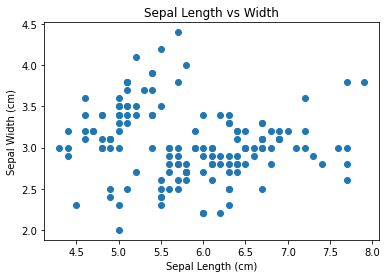

In [9]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot. 


Most of the Iris flowers have a sepal length of 5.5 - 7 cm and a sepal width of 2.25 - 3.25 cm. 

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

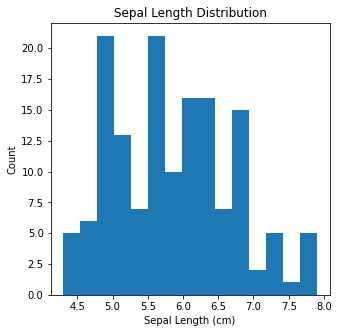

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(data.sepal_length, bins = 15)
ax.set(xlabel='Sepal Length (cm)',ylabel='Count', title = "Sepal Length Distribution");

* The function of the histogram is to show the distribution of the data or the frequency of the data.

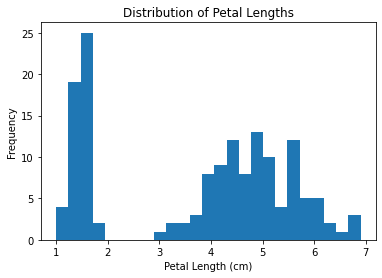

In [28]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot? 

Whishker-boxplot is a boxplot that is used to show the distribution of the data. It is also especially useful to see which data point is an outlier. The whiskers extend to show the minimum and maximum values of the data that is not considered to be an outlier. The box part shows us where most of the data points lie. The box shows us the interquartile range consisting of the 1st quartile, the median, and the 3rd quartile. The whiskers show us the range of the data.

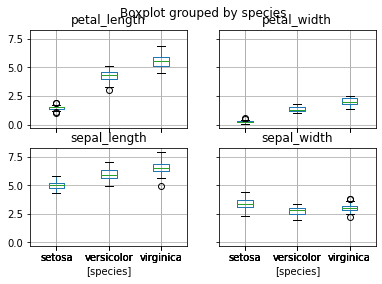

In [29]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

In [30]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

species   measurement  size
0  setosa  sepal_length   5.1
1  setosa   sepal_width   3.5
2  setosa  petal_length   1.4
3  setosa   petal_width   0.2
4  setosa  sepal_length   4.9

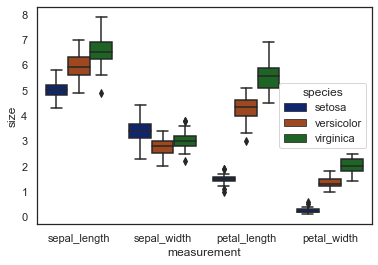

In [31]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements. 

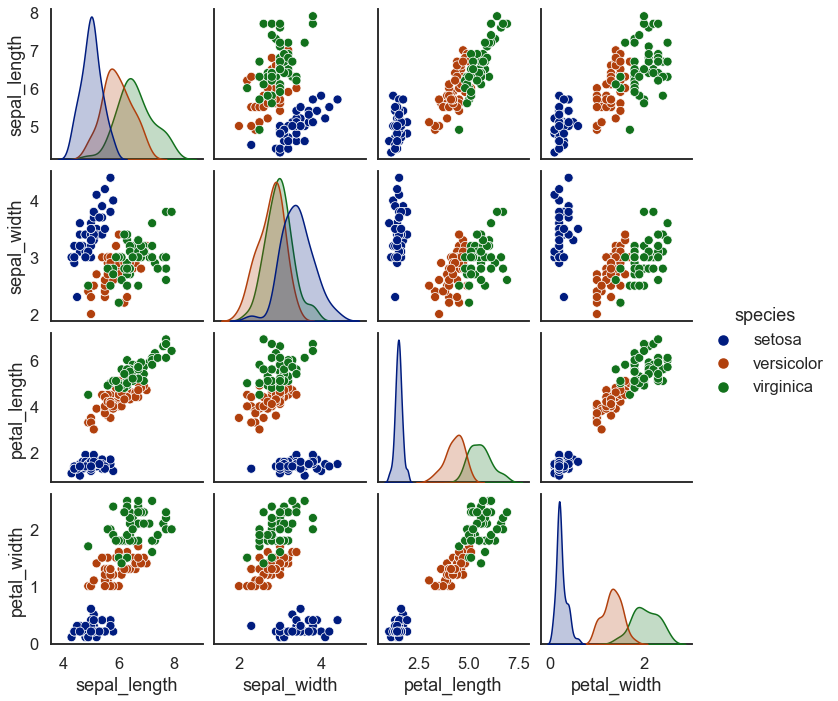

In [32]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');



* The pairplot shows correlation between the measurements. The more clustered the three species are in the scatter plots show that they are correlated. It seems that Virginica and Versicolor are correlated with each other. As one can observe, te Setosa has measurements that are very much seperated and often not overlapping with the other species.

# Supplementary Activity:
* Choose your own dataset
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

In [53]:
data1 = pd.read_csv(r"C:\Users\core i5\Desktop\GitHub\DataScience\datascience\ZTM - Data Science and Machine Learning\data\car-sales-extended.csv")

print('there are {} rows and {} columns'.format(data1.shape[0], data1.shape[1]))

there are 1000 rows and 5 columns


In [42]:
data1.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [51]:
print(data1.Make.unique().tolist())
print(data1.Colour.unique().tolist())

['Honda', 'BMW', 'Toyota', 'Nissan']
['White', 'Blue', 'Red', 'Green', 'Black']


In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [55]:
data1.describe(include="all")

Make Colour  Odometer (KM)        Doors         Price
count     1000   1000    1000.000000  1000.000000   1000.000000
unique       4      5            NaN          NaN           NaN
top     Toyota  White            NaN          NaN           NaN
freq       398    407            NaN          NaN           NaN
mean       NaN    NaN  131073.708000     4.014000  16045.665000
std        NaN    NaN   68859.723885     0.379405   8630.794219
min        NaN    NaN   10148.000000     3.000000   2796.000000
25%        NaN    NaN   71238.000000     4.000000   9481.500000
50%        NaN    NaN  131202.000000     4.000000  14264.000000
75%        NaN    NaN  192372.750000     4.000000  20738.750000
max        NaN    NaN  249860.000000     5.000000  52458.000000

In [60]:
data1.groupby(["Make","Colour"]).median()

Odometer (KM)  Doors    Price
Make   Colour                               
BMW    Black        179868.0    5.0  24692.5
       Blue          96339.0    5.0  30258.0
       Green        157425.0    5.0  18607.0
       Red          149413.0    5.0  19186.0
       White        118286.0    5.0  26940.0
Honda  Black        148884.0    4.0  12179.0
       Blue         134754.5    4.0  13260.0
       Green        110013.5    4.0  13794.0
       Red          110260.5    4.0  14146.0
       White        116084.5    4.0  13240.5
Nissan Black        162523.0    4.0  10962.0
       Blue         157982.5    4.0  13277.0
       Green        158317.0    4.0  11344.5
       Red          146883.5    4.0  13948.0
       White        133069.0    4.0  11768.0
Toyota Black        114180.5    4.0  15140.5
       Blue         152042.0    4.0  14442.0
       Green        146940.0    4.0  13430.0
       Red          148518.0    4.0  12001.0
       White        127161.0    4.0  14318.0

In [59]:
data1.groupby(["Make","Colour"]).mean()

Odometer (KM)     Doors         Price
Make   Colour                                       
BMW    Black   147689.625000  4.250000  24706.000000
       Blue    113372.088235  4.294118  28845.058824
       Green   148823.500000  5.000000  19438.750000
       Red     119749.076923  5.000000  22510.230769
       White   123529.351351  4.675676  29255.675676
Honda  Black   142991.437500  4.000000  13926.031250
       Blue    130140.076923  4.000000  14107.019231
       Green   121674.888889  4.000000  17320.444444
       Red     116423.692308  4.000000  15180.615385
       White   117512.209677  4.000000  14460.403226
Nissan Black   143084.866667  4.000000  13601.000000
       Blue    135848.250000  3.716667  14078.483333
       Green   148961.250000  3.687500  12509.562500
       Red     138290.500000  3.722222  13069.166667
       White   130958.696629  3.808989  13710.505618
Toyota Black   121501.045455  4.000000  16680.750000
       Blue    144026.186992  4.000000  16069.764228
       Green   142524.945946  4.000000  13585.783784
       Red     138030.594595  4.000000  13848.756757
       White   130915.496815  4.000000  15887.872611

In [ ]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data1.Price, data1["Odometer (KM)"], alpha = 0.5, c = data1.Make)

# Label the axes
ax.set(xlabel='Car Price',
       ylabel='Odometer reading',
       title='Price of cars VS # of Doors');

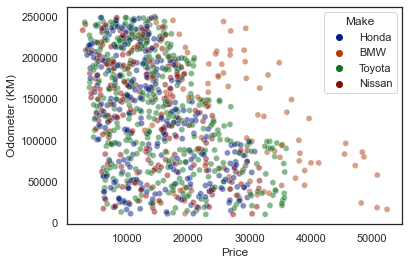

<Figure size 1440x1440 with 0 Axes>

In [93]:
import seaborn as sns

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
sns.scatterplot(x = data1.Price, y = data1["Odometer (KM)"], alpha = 0.5, hue = data1.Make, data = data1)


f = plt.figure(figsize=(20,20));


It seems that the cars of BMW type are usually not correlated with the prices and odometer numbers for the other cars. The highest priced cars seem to be BMWs. 

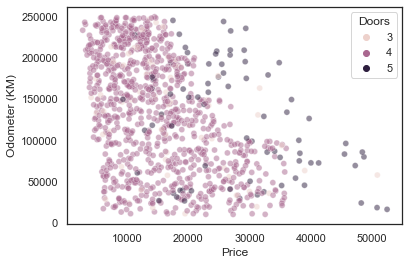

<Figure size 1440x1440 with 0 Axes>

In [96]:
import seaborn as sns

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
sns.scatterplot(x = data1.Price, y = data1["Odometer (KM)"], alpha = 0.5, hue = data1.Doors, data = data1 )

# Label the axes
# ax.set(xlabel='Car Price',
#        ylabel='Odometer reading',
#        title='Price of cars VS # of Doors');
f = plt.figure(figsize=(20,20));

As expected the cars that or of the highest prices not only are BMWs but also those that have 5 doors. 

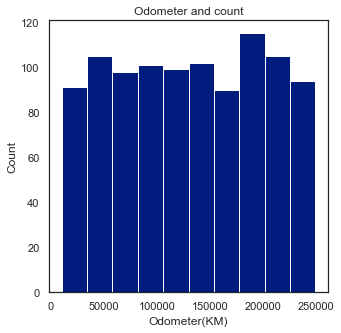

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(data1["Odometer (KM)"], bins = 10)
ax.set(xlabel='Odometer(KM)',ylabel='Count', title = "Odometer and count");

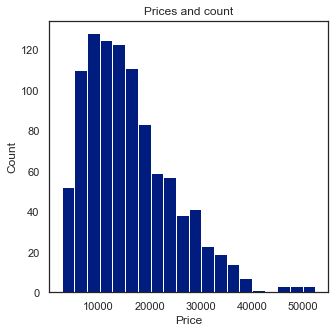

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(data1["Price"], bins = 20)
ax.set(xlabel='Price',ylabel='Count', title = "Prices and count");

Most cars are on the cheaper side around the price of 10k to 20k

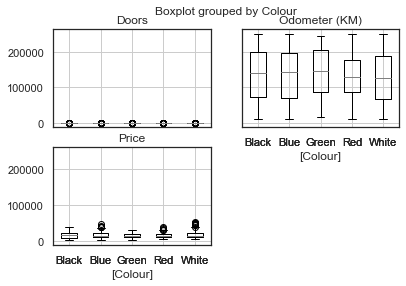

In [107]:
#boxplot
data1.boxplot(by='Colour');

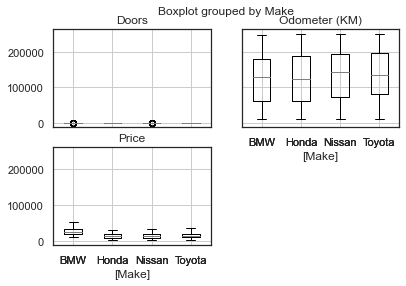

In [108]:
data1.boxplot(by='Make');

In [116]:
data2 = data1.drop("Colour", axis = 1)

In [ ]:
plot_data = (data2
             .set_index('Make')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

In [119]:
plot_data.head()

Make    measurement    size
0  Honda  Odometer (KM)   35431
1  Honda          Doors       4
2  Honda          Price   15323
3    BMW  Odometer (KM)  192714
4    BMW          Doors       5

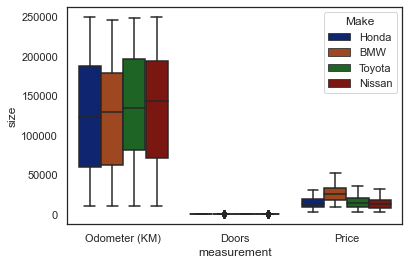

In [120]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='Make', data=plot_data);

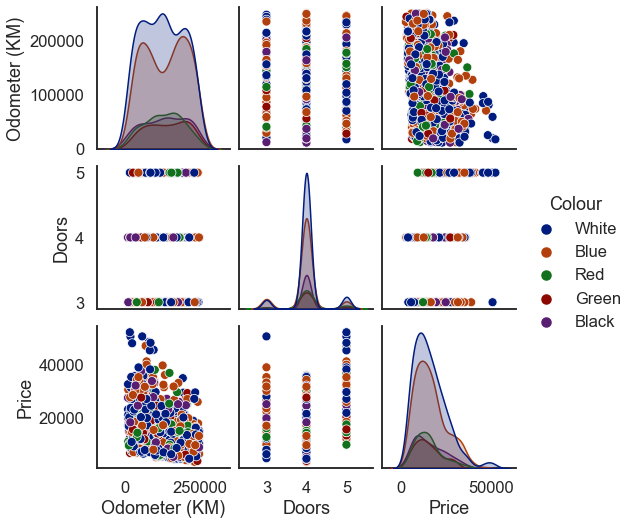

In [121]:
#pair plot
sns.set_context('talk')
sns.pairplot(data1, hue='Colour');

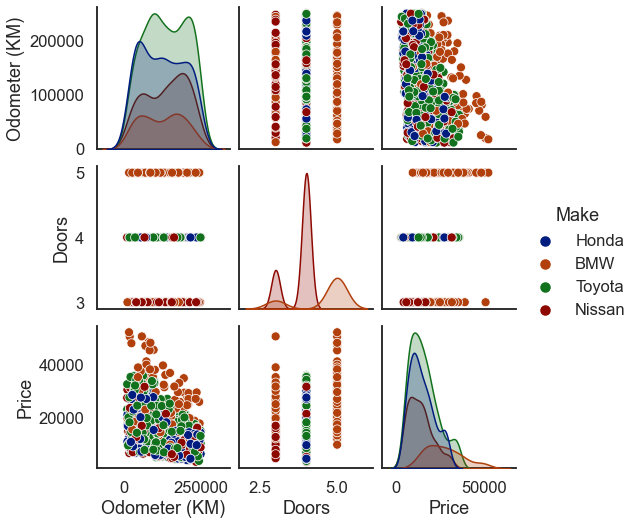

In [122]:
#pair plot2
sns.set_context('talk')
sns.pairplot(data1, hue='Make');

# Conclusion
In conclusion, this activity was a refresher on what I learned in Data Science 1 regarding exploratory data analysis. I also learned how to use the different toolsets in deriving insights from my datasets. 